In [228]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

In [229]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##### Read the dataset to python environment

In [230]:
df=pd.read_csv("StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [231]:
## Print the first 5 lines of the  data

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [232]:
## Print the last 5 lines of the  data

df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93
999,male,group E,bachelor's degree,standard,completed,100,100,100


In [233]:
# Display the full summmary of the data frame.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [234]:
 # Display the full description of the data in the DataFrame
    
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


## 1. Find out how many males and females participated in the test.

In [235]:
mf = df["gender"].value_counts()
mf

female    518
male      482
Name: gender, dtype: int64

##### Here, the number of males participated in the test is 482 and the number of females participated in the test is 518. Therfore , Female     participation in the test is more compared to male participation.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


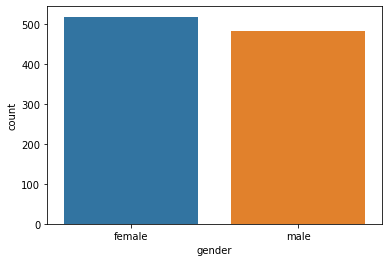

In [236]:
sns.countplot(df["gender"])
plt.show()

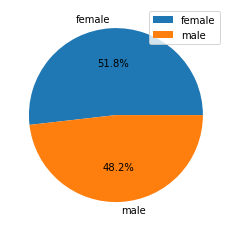

In [237]:
labels = mf.index
plt.pie(mf , labels = labels , autopct="%1.1f%%" , )
plt.legend(labels)
plt.show()

## 2. What do you think about the students' parental level of education?

In [238]:
education_1= df["parental level of education"].value_counts()
education_1

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

##### Here, the students parental level of education decreases as it comes over to higher educational qualification. Around 59 student's parents have only accured Master's degree.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


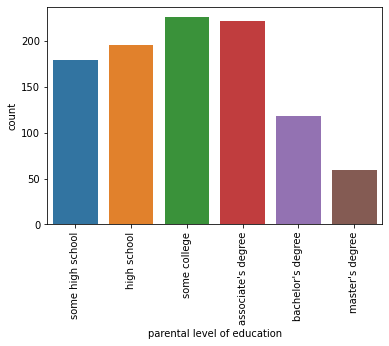

In [239]:
sns.countplot(df["parental level of education"])
plt.xticks(rotation = 90 )
plt.show()

In [240]:
education = df["gender"].groupby(df["parental level of education"]).value_counts()
education

parental level of education  gender
associate's degree           female    116
                             male      106
bachelor's degree            female     63
                             male       55
high school                  male      102
                             female     94
master's degree              female     36
                             male       23
some college                 female    118
                             male      108
some high school             female     91
                             male       88
Name: gender, dtype: int64

##### While considering student's parental level of education based on gender  in most of the case of  except high school  females are dominant.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


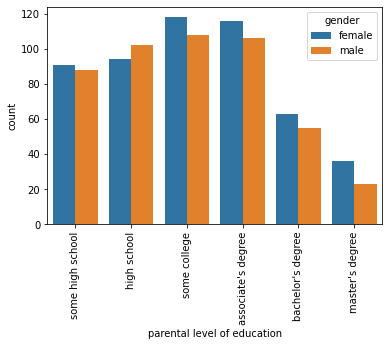

In [241]:
sns.countplot(df["parental level of education"] , hue =df["gender"])
plt.xticks(rotation = 90 )
plt.show()

## 3. Who scores the most on average for math, reading and writing based on

        

###         1. Gender

In [242]:
df1 = df.groupby(["gender"])[["reading score", "math score", "writing score"]].mean()
df1

,reading score,math score,writing score
gender,,,
female,72.590734,63.376448,72.467181
male,65.545643,68.821577,63.446058


##### Based on gender , Female score the most on average for reading score and writing score while Male score the most on average for math score.

## 3. Who scores the most on average for math, reading and writing based on

        


###                2.Test preparation course

In [243]:
df3 = df.groupby(["test preparation course"])[["reading score", "math score", "writing score"]].mean()
df3

,reading score,math score,writing score
test preparation course,,,
completed,74.175978,69.96648,74.684358
none,66.417445,63.78972,64.457944


##### Based on the Test preparation course , The completed student score the most on average for math, reading and writing compared to those who have not completed the course.

## 4. What do you think about the scoring variation for math, reading and writing based on
   
               

###           1. Gender

In [244]:

df4 = df.groupby(["gender"])[["reading score", "math score", "writing score"]].var()
df4

,reading score,math score,writing score
gender,,,
female,207.677438,256.958593,220.369327
male,200.211010,211.889097,202.413924


In [245]:
df4 = df.groupby(["gender"])[["reading score", "math score", "writing score"]].std()
df4

,reading score,math score,writing score
gender,,,
female,14.411018,16.029928,14.844842
male,14.149594,14.556411,14.227225


##### Female scoring variation for math, reading and writing are more compared to male while considering gender.

## 4. What do you think about the scoring variation for math, reading and writing based on
    
              

###          2. Test preparation course

In [246]:

df5 = df.groupby(["test preparation course"])[["reading score", "math score", "writing score"]].var()
df5

,reading score,math score,writing score
test preparation course,,,
completed,183.265864,210.884027,175.202612
none,213.419851,246.668662,226.251739


In [247]:
df5 = df.groupby(["test preparation course"])[["reading score", "math score", "writing score"]].std()
df5

,reading score,math score,writing score
test preparation course,,,
completed,13.537572,14.521847,13.236412
none,14.608896,15.705689,15.041667


##### Here, Those who have not completed the test preparation course have the scoring variation for math, reading and writing. 

## 5. The management needs your help to give bonus points to the top 25% of students based on their math score, so how will you help the management to achieve this.  
    
   

In [248]:
sort = df.sort_values(by=["math score"], ascending=False)
sort


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
996,male,group A,some college,standard,completed,100,96,86
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100
516,female,group E,bachelor's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
2,female,group B,some high school,free/reduced,none,18,32,28
51,female,group C,some high school,free/reduced,none,13,41,51
3,female,group B,some college,standard,none,11,38,32
1,female,group B,high school,free/reduced,none,8,24,23


In [249]:
q75=sort["math score"].quantile(q=0.75)
sort[sort["math score"].ge(q75)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
996,male,group A,some college,standard,completed,100,96,86
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100
516,female,group E,bachelor's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
851,male,group D,some college,standard,completed,77,62,62
849,male,group A,bachelor's degree,standard,none,77,67,68
850,male,group C,associate's degree,free/reduced,none,77,67,64
421,female,group C,some college,free/reduced,none,77,90,91


#### Thus, the bonus points to the top 25% of students based on their math score are listed above.